install mmdetection

In [2]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

/bin/bash: nvcc: command not found
gcc (Ubuntu 9.4.0-1ubuntu1~20.04.2) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [3]:
# install dependencies
%pip install -U openmim
!mim install "mmengine>=0.7.0"
!mim install "mmcv>=2.0.0rc4"

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git -b dev-3.x
%cd mmdetection

%pip install -e .

Note: you may need to restart the kernel to use updated packages.
Looking in links: https://download.openmmlab.com/mmcv/dist/cpu/torch2.1.0/index.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cpu/torch2.1.0/index.html
Cloning into 'mmdetection'...
remote: Enumerating objects: 37590, done.
remote: Counting objects: 100% (191/191), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 37590 (delta 65), reused 141 (delta 56), pack-reused 37399
Receiving objects: 100% (37590/37590), 63.05 MiB | 4.25 MiB/s, done.
Resolving deltas: 100% (25888/25888), done.
/home/wzhmiasanmia/hi_workspace/wheel_bolt_recognition/mmdetection
Obtaining file:///home/wzhmiasanmia/hi_workspace/wheel_bolt_recognition/mmdetection
  Preparing metadata (setup.py) ... done
  Attempting uninstall: mmdet
    Found existing installation: mmdet 3.2.0
    Uninstalling mmdet-3.2.0:
      Successfully uninstalled mmdet-3.2.0
  Running setup.py develop for mmdet
Note: you may need to restart 

environment

In [4]:
from mmengine.utils import get_git_hash
from mmengine.utils.dl_utils import collect_env as collect_base_env

import mmdet


def collect_env():
    """Collect the information of the running environments."""
    env_info = collect_base_env()
    env_info['MMDetection'] = f'{mmdet.__version__}+{get_git_hash()[:7]}'
    return env_info


if __name__ == '__main__':
    for name, val in collect_env().items():
        print(f'{name}: {val}')

sys.platform: linux
Python: 3.8.18 (default, Sep 11 2023, 13:40:15) [GCC 11.2.0]
CUDA available: False
numpy_random_seed: 2147483648
GCC: gcc (Ubuntu 9.4.0-1ubuntu1~20.04.2) 9.4.0
PyTorch: 2.1.0
PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2023.1-Product Build 20230303 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - Build settings: BLAS_INFO=mkl, BUILD_TYPE=Release, CXX_COMPILER=/opt/rh/devtoolset-9/root/usr/bin/c++, CXX_FLAGS= -D_GLIBCXX_USE_CXX11_ABI=0 -fabi-version=11 -fvisibility-inlines-hidden -DUSE_PTHREADPOOL -DNDEBUG -DUSE_KINETO -DLIBKINETO_NOCUPTI -DLIBKINETO_NOROCTRACER -DUSE_FBGEMM -DUSE_QNNPACK -DUSE_PYTORCH_QNNPACK -DUSE_XNNPACK -DSYMBOLICATE_MOBILE_DEBUG_HANDLE -O2 -fPIC -W

load weights

In [6]:
!mkdir ./checkpoints
!mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest ./checkpoints

processing rtmdet_tiny_8xb32-300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 MiB 5.3 MB/s eta 0:00:0000:0100:01
Successfully downloaded rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth to /home/wzhmiasanmia/hi_workspace/wheel_bolt_recognition/mmdetection/checkpoints
Successfully dumped rtmdet_tiny_8xb32-300e_coco.py to /home/wzhmiasanmia/hi_workspace/wheel_bolt_recognition/mmdetection/checkpoints


Inference

In [8]:
from mmdet.apis import DetInferencer

# Setup a checkpoint file to load
checkpoint = './mmdetection/checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'

# Initialize the DetInferencer
inferencer = DetInferencer(model='rtmdet_tiny_8xb32-300e_coco', weights=checkpoint)

# Perform inference
inferencer('mmdetection/tire_2.jpg', out_dir='./output')

Loads checkpoint by local backend from path: ./mmdetection/checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



{'predictions': [{'labels': [74,
    70,
    9,
    61,
    29,
    12,
    67,
    45,
    11,
    41,
    68,
    69,
    65,
    5,
    4,
    78,
    2,
    64,
    62,
    6,
    71,
    15,
    65,
    60,
    76,
    7,
    40,
    74,
    54,
    0,
    0,
    3,
    56,
    67,
    54,
    55,
    28,
    15,
    0,
    37,
    60,
    16,
    8,
    2,
    0,
    77,
    6,
    0,
    21,
    9,
    36,
    76,
    74,
    72,
    74,
    74,
    12,
    74,
    74,
    0,
    2,
    74,
    75,
    2,
    74,
    50,
    0,
    32,
    74,
    41,
    41,
    74,
    40,
    74,
    16,
    6,
    10,
    28,
    25,
    61,
    49,
    0,
    24,
    74,
    46,
    74,
    60,
    74,
    0,
    1,
    16,
    74,
    0,
    39,
    2,
    0,
    15,
    74,
    79,
    47,
    9,
    31,
    2,
    2,
    39,
    6,
    55,
    50,
    54,
    41,
    74,
    47,
    45,
    59,
    74,
    69,
    73,
    74,
    74,
    0,
    59,
    6,
    74,
    60,
    67,
    0,
 

output

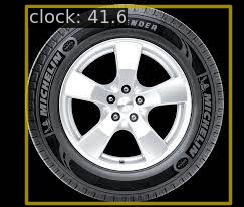

In [9]:
# Show the output image
from PIL import Image
Image.open('./output/vis/tire_2.jpg')